<hr>

# ST1511 AI and Machine Learning CA1 Assignment (Regression)
<hr>

Name: Lee Hong Yi <br>
Class: DAAA/FT/2A/05 <br>
Admin Number: p2223010 <br>

__Objective:__ <br>
Predict the price of a house in the United States based on various factors.

__Background Information:__<br>
The price of a house is based on several factors, such as it's location, area, and amenities, such as bedrooms, toilets, and renovation status.


__Additional Information:__ <br>

<hr>
<font size = 5>Importing Libraries</font>
<hr>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import ShuffleSplit, GridSearchCV, RandomizedSearchCV, train_test_split

from warnings import simplefilter


simplefilter(action='ignore', category=FutureWarning)

<font size = 5> Preparing data.</font> <br>

Since the data has already been collected, we can move straight onto preparing the data for training by the model.

In [3]:
original_data = pd.read_csv("./housing_dataset.csv")
eda_data = original_data.copy()

target_data = pd.DataFrame(original_data["Price ($)"])
analysis_data = original_data.drop(columns = ['Price ($)'])

display(analysis_data.head())
display(target_data.head())


,House ID,City,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Renovation Status
0,0,Chicago,742.0,4,2,3,furnished
1,1,Denver,896.0,4,4,4,furnished
2,2,Chicago,996.0,3,2,2,semi-furnished
3,3,Seattle,750.0,4,2,2,furnished
4,4,New York,742.0,4,1,2,furnished


,Price ($)
0,1330000
1,1225000
2,1225000
3,1221500
4,1141000


In [4]:
eda_data.describe()

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,Price ($)
count,545.00000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,272.00000,515.054128,2.965138,1.286239,1.805505,4.766729e+05
std,157.47222,217.014102,0.738064,0.502470,0.867492,1.870440e+05
min,0.00000,165.000000,1.000000,1.000000,1.000000,1.750000e+05
25%,136.00000,360.000000,2.000000,1.000000,1.000000,3.430000e+05
50%,272.00000,460.000000,3.000000,1.000000,2.000000,4.340000e+05
75%,408.00000,636.000000,3.000000,2.000000,2.000000,5.740000e+05
max,544.00000,1620.000000,6.000000,4.000000,4.000000,1.330000e+06


In [5]:
display(eda_data.value_counts("City"))
display(eda_data.value_counts("No. of Bedrooms"))
display(eda_data.value_counts("No. of Toilets"))
display(eda_data.value_counts("Stories"))

City
New York    158
Seattle     134
Boston      105
Denver       89
Chicago      59
dtype: int64

No. of Bedrooms
3    300
2    136
4     95
5     10
1      2
6      2
dtype: int64

No. of Toilets
1    401
2    133
3     10
4      1
dtype: int64

Stories
2    238
1    227
4     41
3     39
dtype: int64

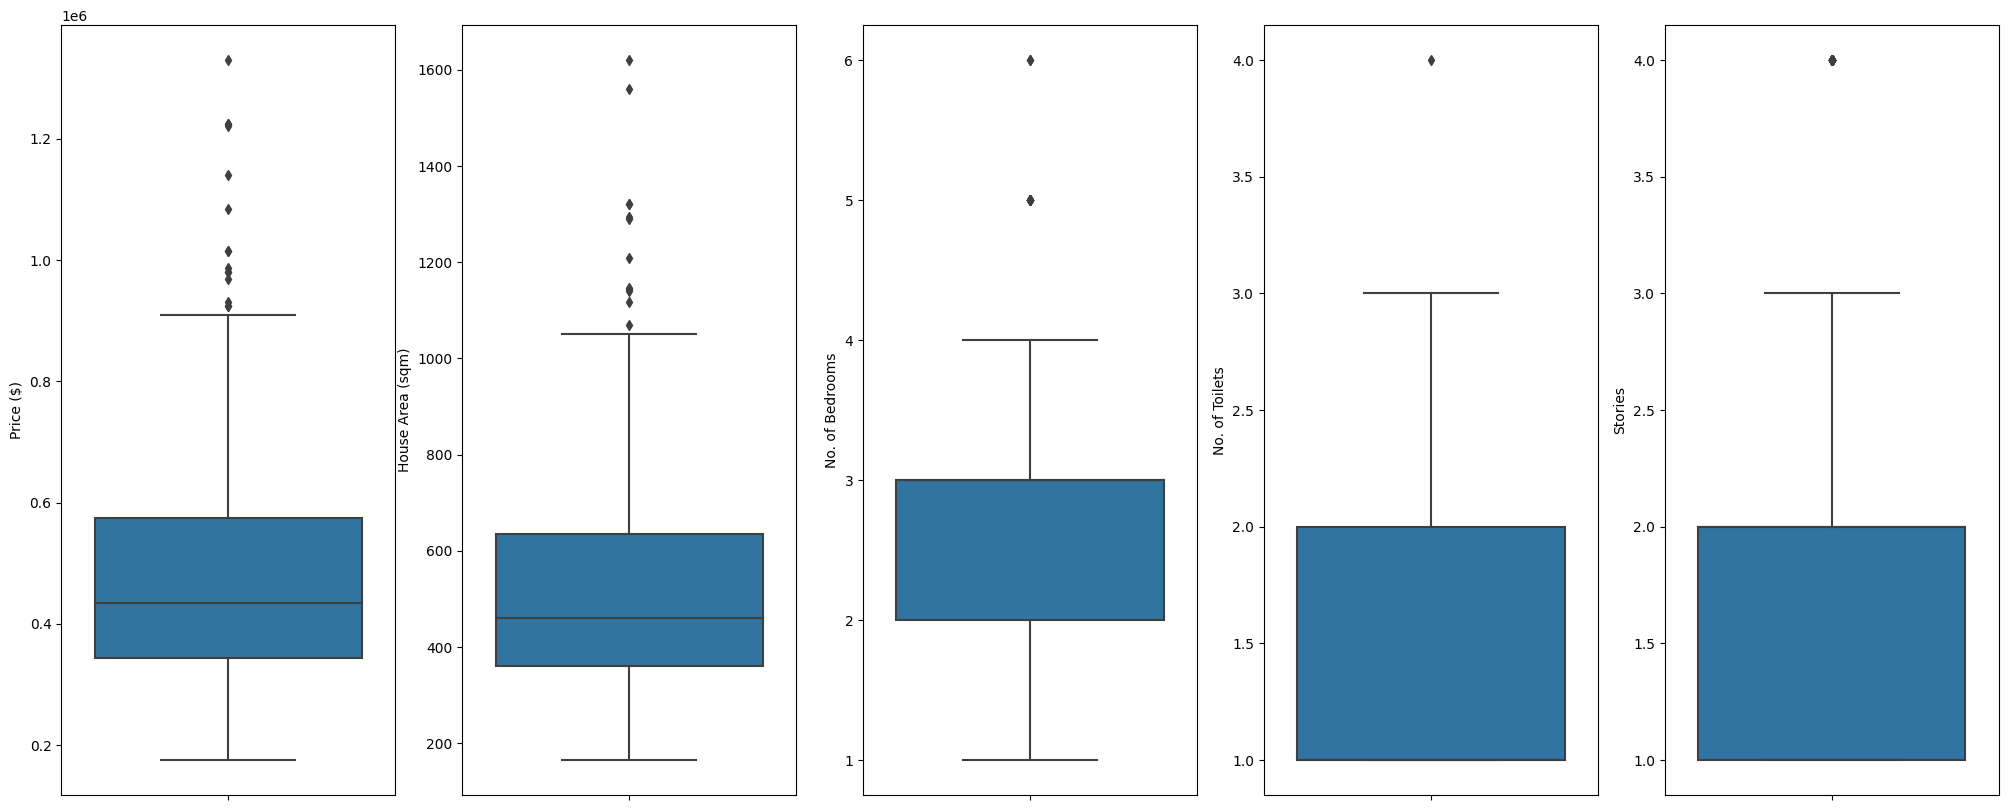

In [6]:
fig, ax = plt.subplots(1,5, figsize = (25,10))

sns.boxplot(data = eda_data, ax = ax[0], y = "Price ($)")
sns.boxplot(data = eda_data, ax = ax[1], y = "House Area (sqm)")
sns.boxplot(data = eda_data, ax = ax[2], y = "No. of Bedrooms")
sns.boxplot(data = eda_data, ax = ax[3], y = "No. of Toilets")
sns.boxplot(data = eda_data, ax = ax[4], y = "Stories")

plt.show()

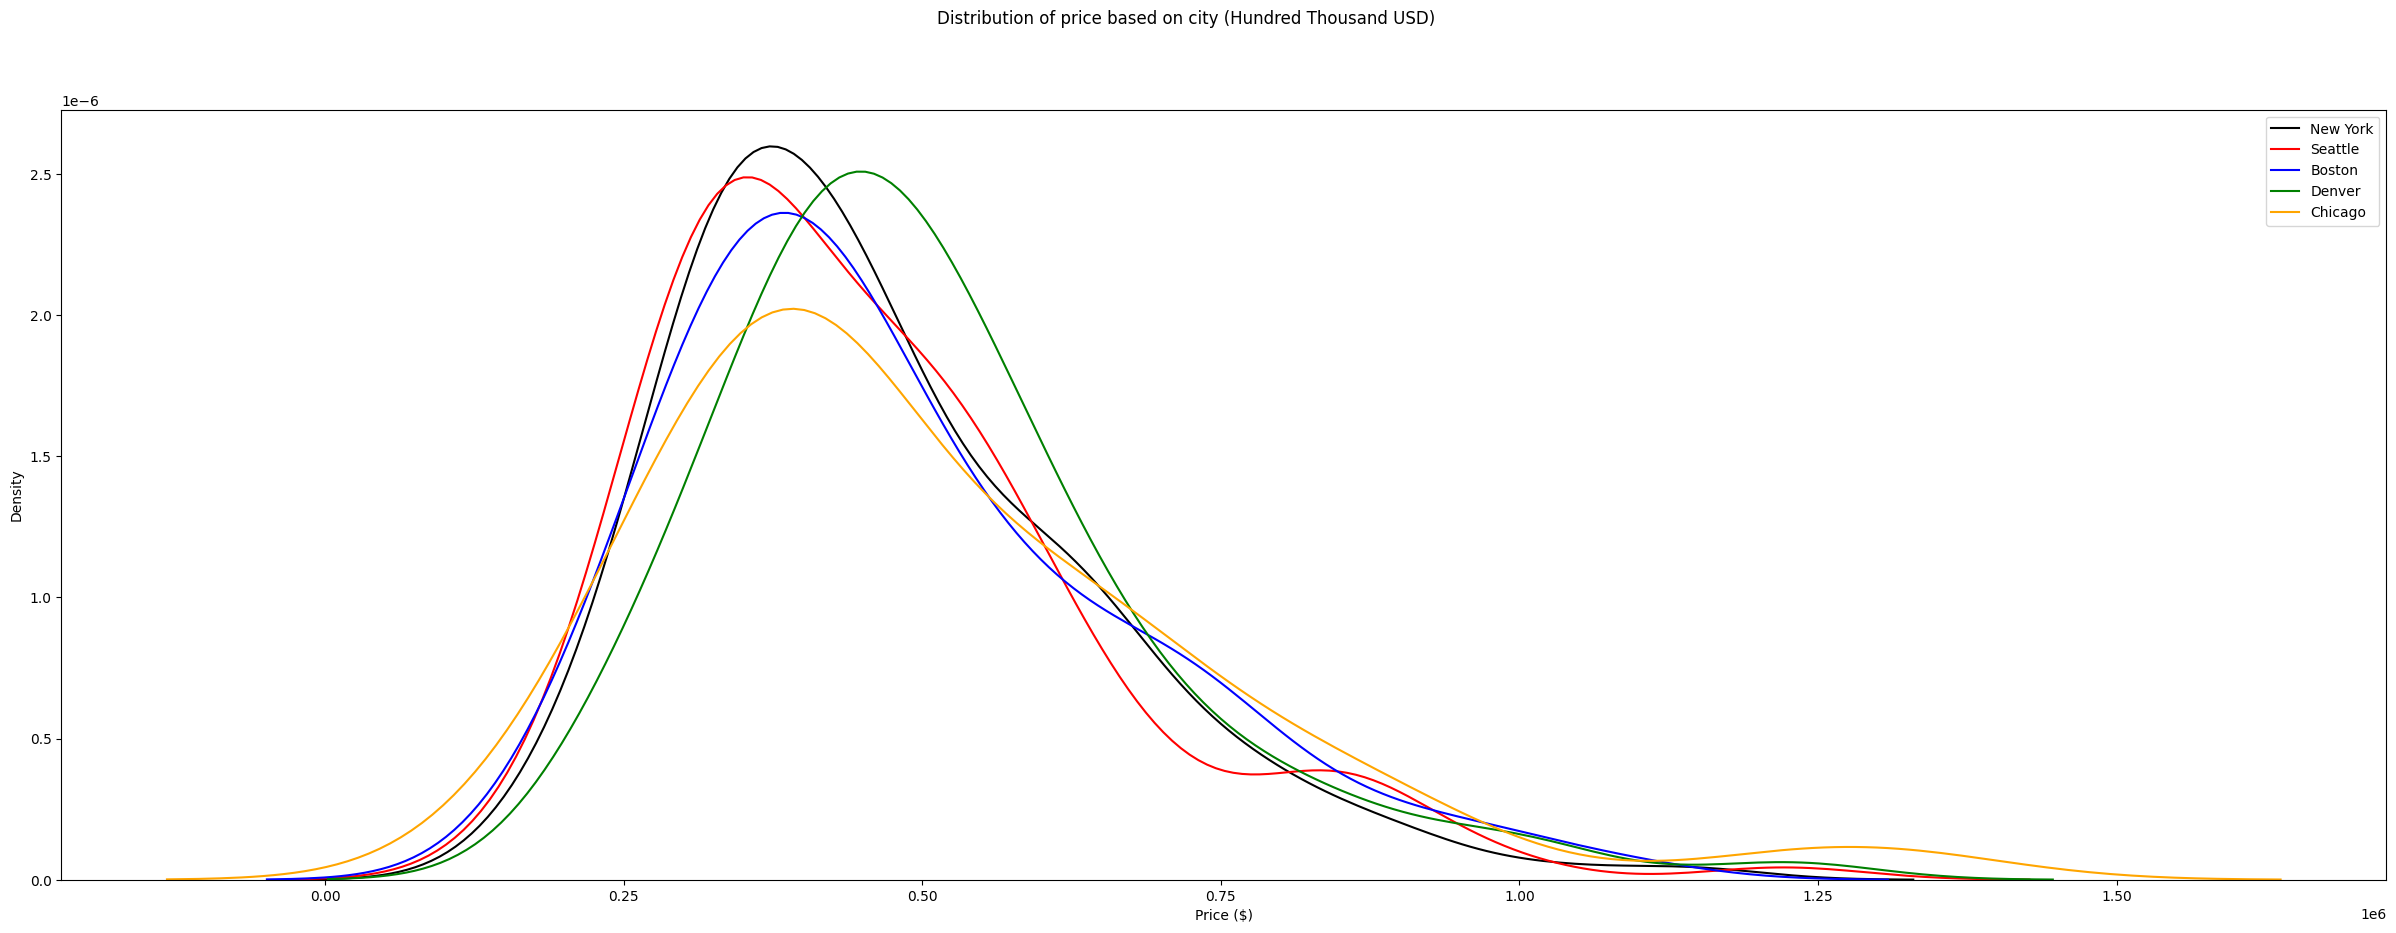

In [7]:
fig, ax = plt.subplots(figsize = (30,10))
fig = sns.kdeplot(data = eda_data[eda_data["City"] == "New York"]["Price ($)"], color = "black", label = "New York")
fig2 = sns.kdeplot(data = eda_data[eda_data["City"] == "Seattle"]["Price ($)"], color = "red", label = "Seattle")
fig3 = sns.kdeplot(data = eda_data[eda_data["City"] == "Boston"]["Price ($)"], color = "blue", label = "Boston")
fig4 = sns.kdeplot(data = eda_data[eda_data["City"] == "Denver"]["Price ($)"], color = "green", label = "Denver")
fig5 = sns.kdeplot(data = eda_data[eda_data["City"] == "Chicago"]["Price ($)"], color = "orange", label = "Chicago")
plt.suptitle("Distribution of price based on city (Hundred Thousand USD)")
ax.legend()
plt.show()


From the above graph, we can see that the city of Denver has houses that are higher on average, as it's price distribution curve is skewed further to the right as compared to the other cities.

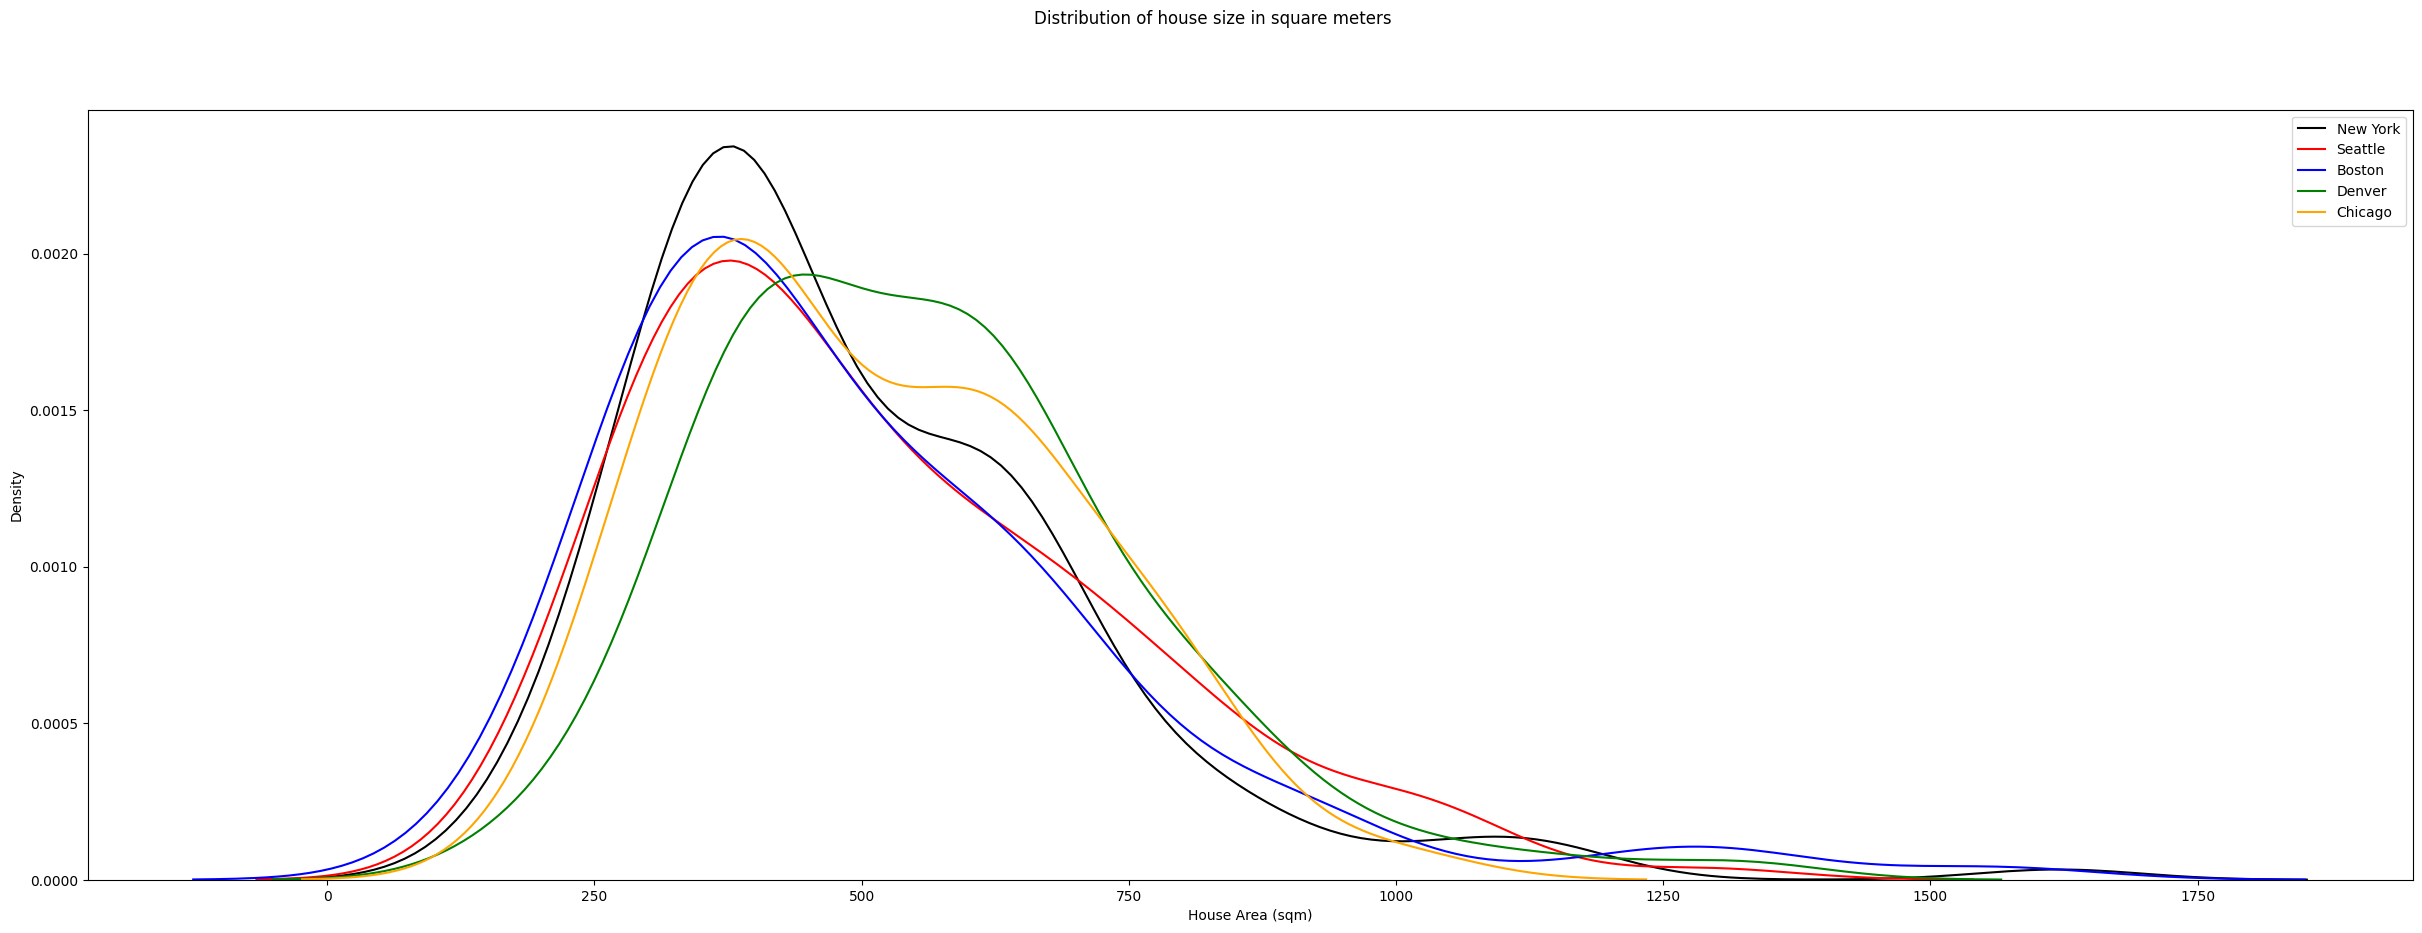

In [8]:
fig, ax = plt.subplots(figsize = (30,10))
fig = sns.kdeplot(data = eda_data[eda_data["City"] == "New York"]["House Area (sqm)"], color = "black", label = "New York")
fig2 = sns.kdeplot(data = eda_data[eda_data["City"] == "Seattle"]["House Area (sqm)"], color = "red", label = "Seattle")
fig3 = sns.kdeplot(data = eda_data[eda_data["City"] == "Boston"]["House Area (sqm)"], color = "blue", label = "Boston")
fig4 = sns.kdeplot(data = eda_data[eda_data["City"] == "Denver"]["House Area (sqm)"], color = "green", label = "Denver")
fig5 = sns.kdeplot(data = eda_data[eda_data["City"] == "Chicago"]["House Area (sqm)"], color = "orange", label = "Chicago")
plt.suptitle("Distribution of house size in square meters")
ax.legend()
plt.show()

From the above graph, we can also see that the city of Denver has houses that are larger on average, as it's distribution curve is skewed further to the right, while also having a lower proportion below ~400sqm as compared to other cities. In addition, the city of New York has more houses that are around 300 sqm, given that the graph has a higher peak at that point on the scale. 

In [9]:
analysis_data = pd.get_dummies(analysis_data)
display(analysis_data.head())
X_train, X_test, y_train, y_test = train_test_split(analysis_data, target_data, test_size=0.3, random_state=42)

,House ID,House Area (sqm),No. of Bedrooms,No. of Toilets,Stories,City_Boston,City_Chicago,City_Denver,City_New York,City_Seattle,Renovation Status_furnished,Renovation Status_semi-furnished,Renovation Status_unfurnished
0,0,742.0,4,2,3,0,1,0,0,0,1,0,0
1,1,896.0,4,4,4,0,0,1,0,0,1,0,0
2,2,996.0,3,2,2,0,1,0,0,0,0,1,0
3,3,750.0,4,2,2,0,0,0,0,1,1,0,0
4,4,742.0,4,1,2,0,0,0,1,0,1,0,0


<font size = 5>Choosing / training a model</font>

<font size = 5 >Evaluating the model</font>